# Homework 03

### Atahan Tap
### 69374

## Importing Data

In [21]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd

data_set_labels = np.genfromtxt("hw03_data_set_labels.csv", converters = {0: lambda n : int(n)})
data_set_images = np.genfromtxt("hw03_data_set_images.csv", delimiter = ",")

training_set = []
test_set = []

for i in range(len(data_set_images)):
    if i%39 < 25:
        training_set.append(data_set_images[i])
    else:
        test_set.append(data_set_images[i])
        
training_set = np.array(training_set)
test_set = np.array(test_set)

training_set_labels = []
test_set_labels = []

for i in range(len(data_set_labels)):
    if i%39 < 25:
        training_set_labels.append(data_set_labels[i])
    else:
        test_set_labels.append(data_set_labels[i])
        
training_set_labels = np.array(training_set_labels)
test_set_labels = np.array(test_set_labels)

K = np.max(data_set_labels)
N = training_set.shape[0]

Y_truth = np.zeros((N, K)).astype(int)
Y_truth[range(N), training_set_labels - 1] = 1

print('Data set divided into training set and test set with corresponding labels. \n')

Data set divided into training set and test set with corresponding labels. 



## Sigmoid and Gradient functions

In [22]:
def sigmoid(X, w, w0):
    return(1 / (1 + np.exp(-(np.matmul(X, w) + w0))))

In [23]:
def gradient_W(X, Y_truth, Y_predicted):
    return(np.asarray([-np.matmul(Y_truth[:,c] - Y_predicted[:,c], X) for c in range(K)]).transpose())

def gradient_w0(Y_truth, Y_predicted):
    return(-np.sum(Y_truth - Y_predicted, axis = 0))

### Parameters

In [24]:
eta = 0.001
epsilon = 0.001

### Initialization of parameters

In [25]:
W = np.random.uniform(low = -0.01, high = 0.01, size = (training_set.shape[1], K))
w0 = np.random.uniform(low = -0.01, high = 0.01, size = (1, K))

def safelog(n):
    return np.log(n+1e-100)

## Iterative algorithm

In [26]:
iteration = 1
objective_values = []

while True:
    Y_predicted = sigmoid(training_set, W, w0)

    objective_values = np.append(objective_values, np.sum((Y_truth -Y_predicted)**2)/2)
    
    W_old = W
    w0_old = w0

    W = W - eta * gradient_W(training_set, Y_truth, Y_predicted)
    w0 = w0 - eta * gradient_w0(Y_truth, Y_predicted)

    error = np.sqrt(np.sum((w0 - w0_old))**2 + np.sum((W - W_old)**2))
    
    if error < epsilon:
        break

    iteration += 1
    
print(W)
print(w0)

[[-0.01232085 -0.10875749 -0.02589668  0.25033479 -0.04096924]
 [-0.13551908  0.01523254 -0.25721299  0.42806084  0.07949414]
 [-0.15928883  0.13287313 -0.27341638  0.32087764  0.08943034]
 ...
 [ 0.06566201  0.28499196  0.09365657 -0.30553153 -0.24376383]
 [ 0.12137637 -0.34922337  0.09522108 -0.3821603  -0.01111678]
 [ 0.14475666 -0.51844485  0.17726443 -0.3181454  -0.01299211]]
[[-0.09542215 -0.38497328 -0.00239406 -0.06647172 -0.35220853]]


## Plotting the objective function values

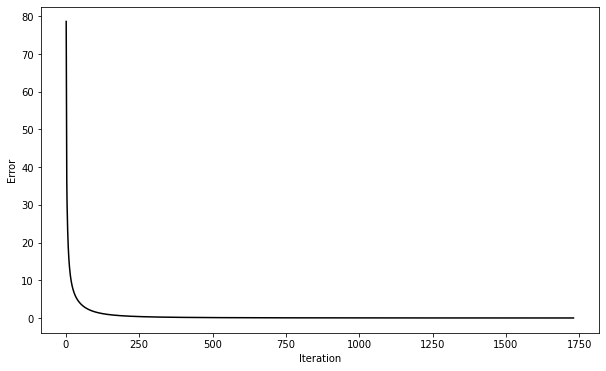

In [27]:
plt.figure(figsize = (10, 6))
plt.plot(range(1, iteration + 1), objective_values, "k-")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.show()

## Confusion matrices

### Training set

In [28]:
y_predicted = np.argmax(Y_predicted, axis = 1) + 1
confusion_matrix_training = pd.crosstab(y_predicted, training_set_labels, rownames = ["y_pred"], colnames = ["y_truth"])
print(confusion_matrix_training)

y_truth   1   2   3   4   5
y_pred                     
1        25   0   0   0   0
2         0  25   0   0   0
3         0   0  25   0   0
4         0   0   0  25   0
5         0   0   0   0  25


### Test set

In [29]:
Y_predicted_test = sigmoid(test_set, W, w0)
y_predicted_test = np.argmax(Y_predicted_test, axis = 1) + 1
confusion_matrix_test = pd.crosstab(y_predicted_test, test_set_labels, rownames = ["y_pred"], colnames = ["y_truth"])
print(confusion_matrix_test)

y_truth   1   2   3   4   5
y_pred                     
1        13   1   0   0   0
2         1  11   0   0   1
3         0   0  14   0   0
4         0   0   0  14   0
5         0   2   0   0  13
